In [1]:
import pandas as pd
from datetime import datetime

# Load cleaned data
df = pd.read_csv('../data/cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate snapshot date (max date + 1)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by Customer ID and calculate RFM
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,67,15,-64.68
1,12347.0,3,2,1323.32
2,12348.0,74,1,222.16
3,12349.0,43,4,2646.99
4,12351.0,11,1,300.93


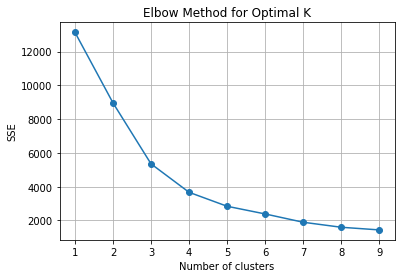

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Find optimal k using Elbow Method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()


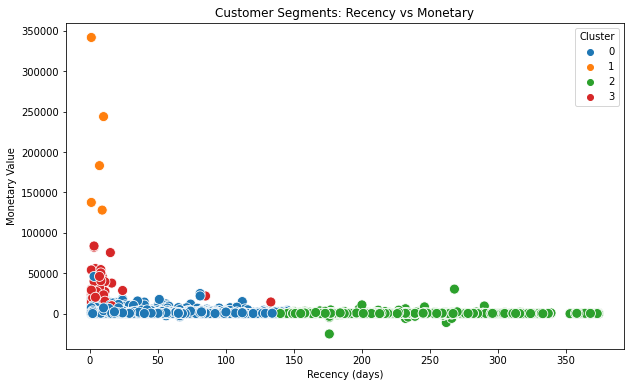

In [3]:
# Apply KMeans with chosen k
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize Recency vs Monetary
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments: Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()
